In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
import seaborn as sns
from matplotlib.gridspec import GridSpec

In [44]:
df = pd.read_csv('concated_egdi_brazil.csv')
df['Percentage'] = df['Percentage'].apply(lambda x: x/100.0)

In [45]:
df = df.drop(columns=['Unnamed: 0'])

In [46]:
df.head(10)

,Survey Year,Metric,Percentage
0,2003,E-Government Index,0.52673
1,2004,E-Government Index,0.56746
2,2005,E-Government Index,0.59811
3,2008,E-Government Index,0.56790
4,2010,E-Government Index,0.50058
5,2012,E-Government Index,0.61673
6,2014,E-Government Index,0.60082
7,2016,E-Government Index,0.63769
8,2018,E-Government Index,0.73270
9,2020,E-Government Index,0.76770


In [47]:
df_egov = df[df['Metric'] == "E-Government Index"]
df_epart = df[df['Metric'] == "E-Participation Index"]
df_services = df[df['Metric'] == "Online Service Index"]
df_humancap = df[df['Metric'] == "Human Capital Index"]
df_telecom = df[df['Metric'] == "Telecommunication Infrastructure Index"]

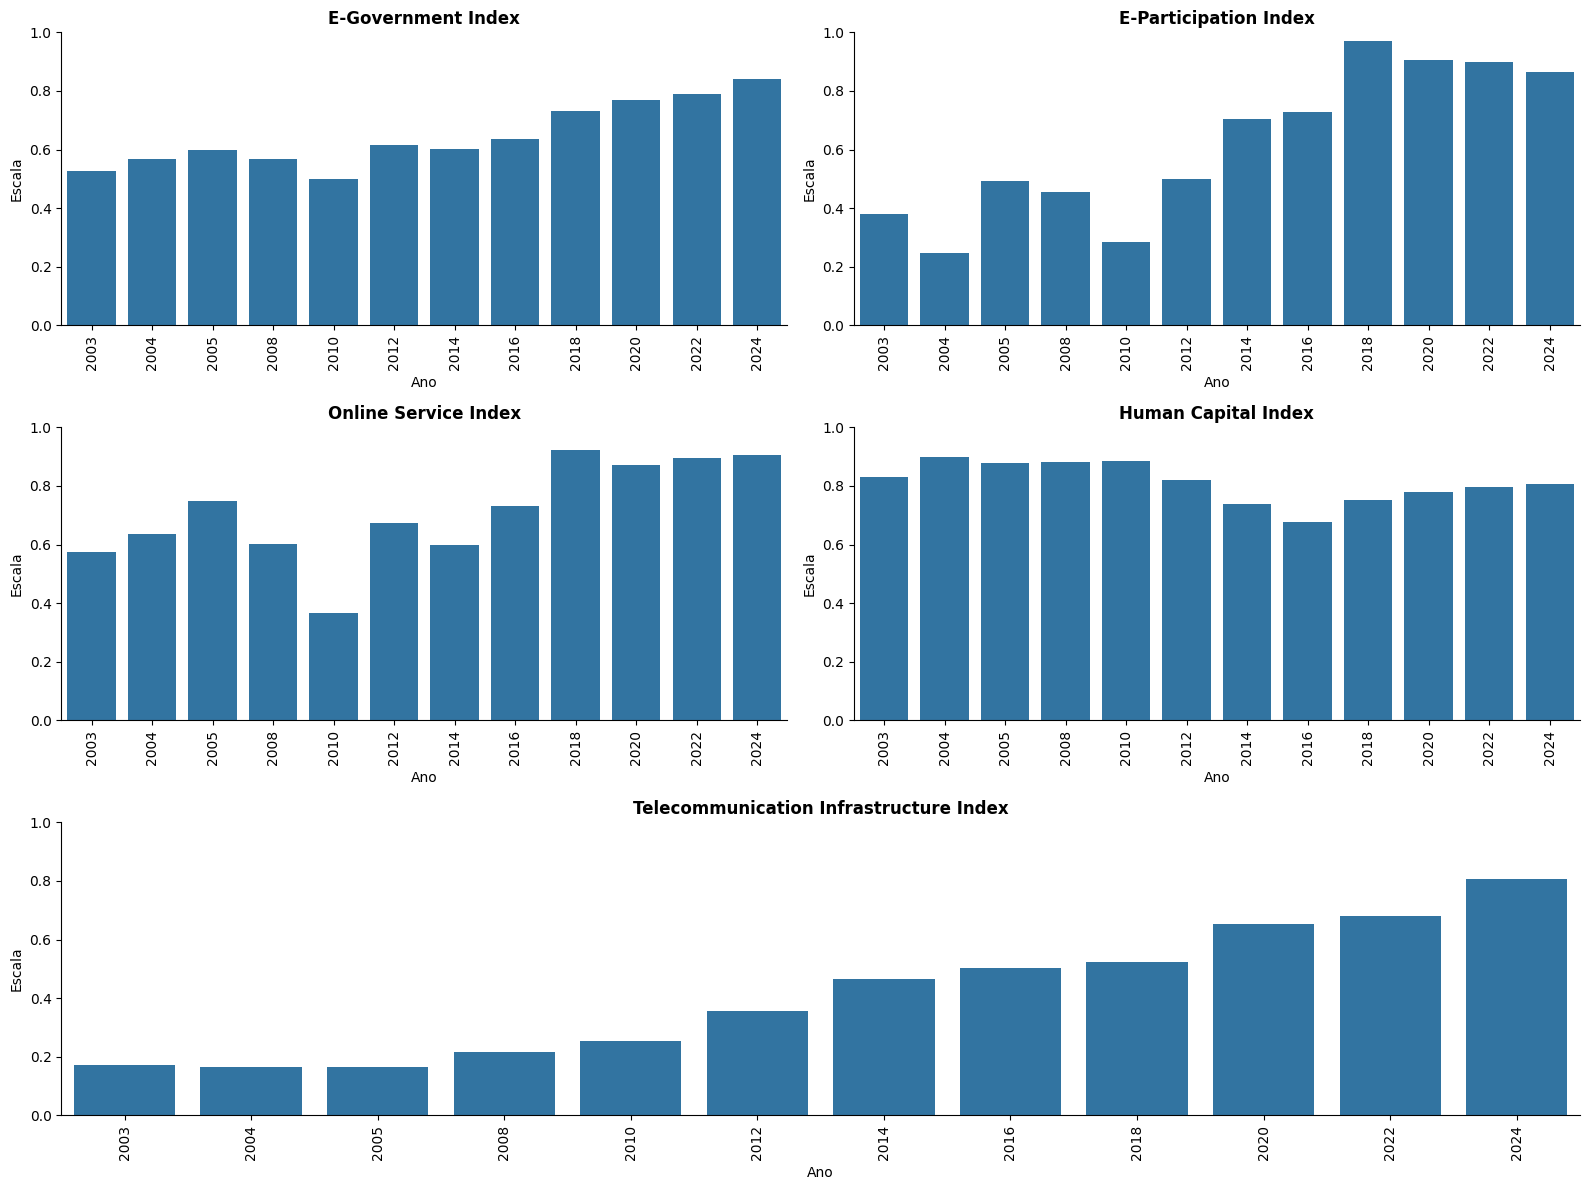

In [48]:
fig = plt.figure(figsize=(16, 12))

gs = GridSpec(3, 2, figure=fig)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1]) 
ax2 = fig.add_subplot(gs[1, 0]) 
ax3 = fig.add_subplot(gs[1, 1]) 
ax4 = fig.add_subplot(gs[2, :]) 

all_axes = [ax0, ax1, ax2, ax3, ax4]

sns.barplot(data=df_egov, y='Percentage', x='Survey Year', orient='v', ax=ax0)
sns.barplot(data=df_epart, y='Percentage', x='Survey Year', orient='v', ax=ax1)
sns.barplot(data=df_services, y='Percentage', x='Survey Year', orient='v', ax=ax2)
sns.barplot(data=df_humancap, y='Percentage', x='Survey Year', orient='v', ax=ax3)
sns.barplot(data=df_telecom, y='Percentage', x='Survey Year', orient='v', ax=ax4)

ax0.set_title('E-Government Index', fontweight='bold')
ax1.set_title('E-Participation Index', fontweight='bold')
ax2.set_title('Online Service Index', fontweight='bold')
ax3.set_title('Human Capital Index', fontweight='bold')
ax4.set_title('Telecommunication Infrastructure Index', fontweight='bold') # Title for the spanned plot

for subplot_ax in all_axes:
    subplot_ax.set_ylim(0, 1) 
    subplot_ax.tick_params(axis='x', rotation=90) 
    subplot_ax.set_ylabel('Escala')
    subplot_ax.set_xlabel('Ano')

plt.subplots_adjust(hspace=0.5)
savefig('C:/Users/lazar/Master-Dissertation/figuras/egdi/barplot_egdi_brasil.png')
sns.despine()
plt.tight_layout() 
plt.show()
